In [68]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (19,10)

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np

## May 10

### Single Frequency

Should check transition probability as a function of energy and distance

data file:

* listDenPlotList-5-20.txt : $\delta m^2$=$\delta m_{13}^2=2.6\times 10^{-15}$, $\theta_V=\theta_{13}=ArcSin[Sqrt[0.093]/2]$, $\lambda=20 \lambda_{\mathrm{MSW}}$, $k=0.9999$, $a=0.1 \lambda/\omega_m$

In [71]:
xdrop, ydrop, z = np.genfromtxt('assets/05-09-2016/listDenPlotListRegular-5-20.txt', unpack=True)

# x = np.arange(0,xdrop[len(xdrop)-1]+1,10);
# y = np.arange(5,ydrop[len(ydrop)-1]+1);

y, x = np.mgrid[slice(20, 5-1, -1),
                slice(0, xdrop[len(xdrop)-1]+1 , 10)]

xlen = len(x[1]);
ylen = len(y);

z = z.reshape(ylen,xlen)
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

#zlog = np.log(z)

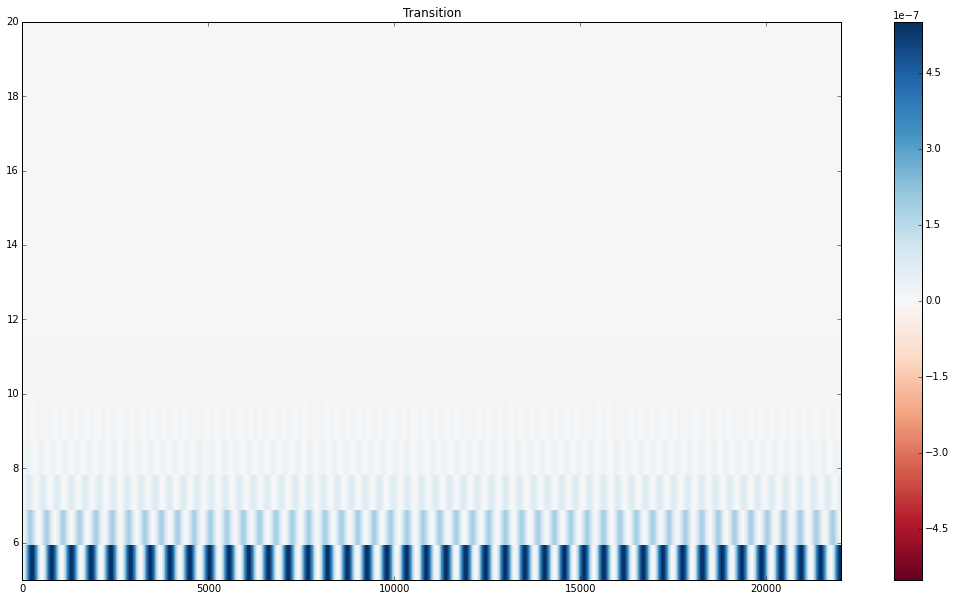

In [72]:
#plt.figure(figsize=(19,10))

plt.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest', origin='lower')

plt.title('Transition')
plt.colorbar()
plt.axes().set_aspect(1000/1)

plt.show()

## May 11

I just realized that there is no need to do the color plot since there is no correlations between different energies.

It is simple enough to just plot everything in the line plots.

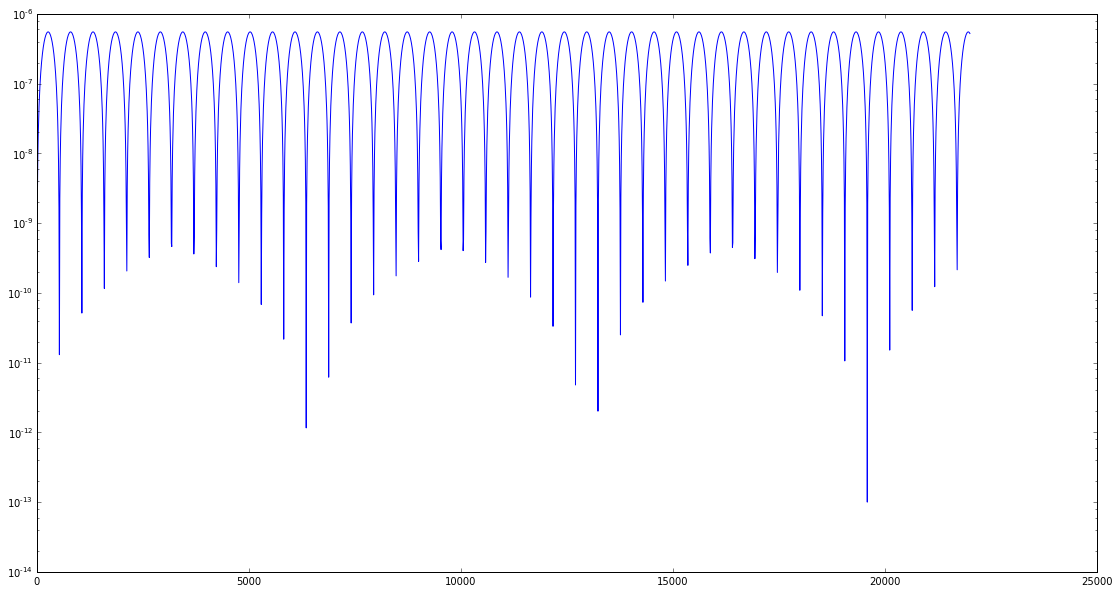

In [59]:
plt.figure(figsize=(19,10))

plt.semilogy(x[0], z[0])

Combine all the different energies

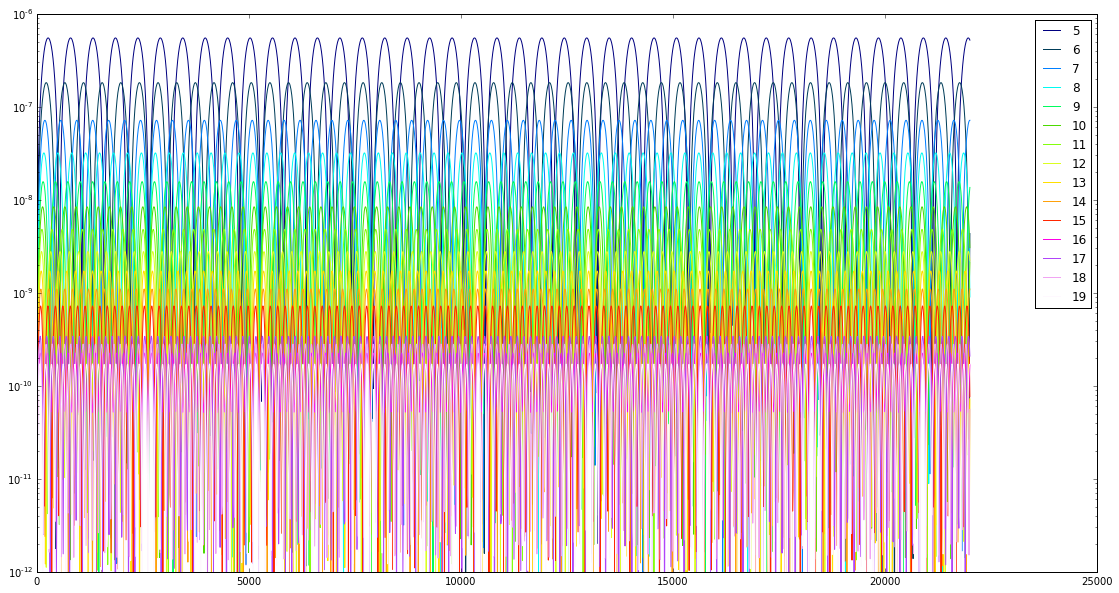

In [74]:
figprob = plt.figure(figsize=(19,10))
axprob = figprob.add_subplot(111)



for i in range(5,20):
    axprob.semilogy( x[i-5],z[i-5] ,label=i)


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(axprob.lines))]
for i,j in enumerate(axprob.lines):
    j.set_color(colors[i])

axprob.legend(loc=0)
plt.ylim([10**(-12),10**(-6)]);

Couldn't get MMA to work. So I just write down something to do.

1. The goal is to understand the effect of extra matter profile frequencies to a resonance.
2. To do that first of all 2 frequencies should be used. How? Look at the analytical results.
3. Multi-frequency
4. Solar neutrinos won't be helpful? SNO ppl must have already calculated for the full matter profile or something.
5. Discrete Fourier series should be used as $\sum_{n=0}^N A_n e^{i 2\pi i k n x/N}$ should chekc this kind of profile and derive the Hamiltonian.

Suppose we have a shock size 22000km (from [matter-stimulated/scales.html](https://github.com/emptymalei/neutrino-researching/tree/reseaching/docs/_build/html/matter-stimulated/scales.html)).

The base k in Fourier transform is $2\pi/22000$ in unit of inverse km. Apply 1/km=1.97*10^(-16)MeV to it, we have

$$
k_0 = \frac{2\pi}{22000}\times 1.97\times 10^{-16}\mathrm{MeV} = 5.626\times 10^{-20}\mathrm{MeV}
$$

To have a resonance at all, $nk \sim \omega_m$ is required.

As a reference for 10MeV neutrinos, the required matter density to have MSW resonance is $\lambda_{\mathrm{MSW}}=1.23955\times 10^{-16}$MeV. Now we use a background matter profile $\lambda_{10} = 10 \lambda_{\mathrm{MSW}}$. And $\omega_v$ can be solved out of it.
$$
\omega_v = \lambda \cos 2\theta_v \pm \sqrt{ (n k)^2 - \lambda^2 \sin^2 2\theta_v }
$$

## May 12

Investigate what excatly happens when multifrequencies are added.

```
deltamsquare13 = 2.6*10^(-15);(*MeV^2*)
energy10 = 10;(*Energy in units of MeV*)
omegaV = deltamsquare13/(2 energy10)(*MeV*);(*For 10 MeV neutrinos*)
```


```
onekList = {0.999};
twokList = {0.999, 0.6};
oneaList = {0.1};
twoaList = {0.1, 0.1};
onephiList = {0};
twophiList = {0, 0};
threekList = {0.999, 0.6, 0.4};
threeaList = {0.1, 0.1, 0.1};
threephiList = {0, 0, 0};
thetaVRes = thetaV;
thetamVRes = thetamV; (*thetaV = ArcSin[Sqrt[0.093]/2]*)
omegaVRes = omegaV; 
endpointNRes = endpointN*15
```

![](assets/05-09-2016/res-inv-single-1.png)

![](assets/05-09-2016/res-inv-two-1.png)

![](assets/05-09-2016/res-inv-three-1.png)

### May 13

Now I am wondering if this modulation happens because of the fact that the actual oscillation is a linear superposition of all the individual oscillations?

I tried to use the three frequencies as an example. For the three frequencies example used previously, the four combinations used are


```
threeEffectiveList = {{0, -1, 4}, {0, 1, 1}, {0, 3, -2}, {1, 0, 0}}
```

![](assets/05-09-2016/res-inv-three-linear-superposition.png)

![](assets/05-09-2016/res-inv-three-linear-superposition-2.png)
![](assets/05-09-2016/res-inv-three-linear-superposition-4.png)

<span style="color:red;">
Why is this happenning? ~~Then how can we have such a high peak? By interference between the two frequencies?~~
</span>

This tells me that we can not just linearly add up the final amplitude for each n list.